In [1]:
%reload_ext autotime
import pandas as pd
import requests
from pprint import pprint
import json5 as json # This is a more forgiving JSON parser that can handle comments, single quotes, and trailing commas
import torch
from PIL import Image
from tqdm.auto import tqdm
pd.options.plotting.backend = "plotly"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

time: 2.93 s (started: 2025-10-29 09:48:45 +13:00)


In [2]:
df = pd.read_excel("givealittle_health.xlsx")

def get_text(row):
  text = ""
  if not pd.isna(row["title"]):
    text += "Title: " + row["title"] + "\n"
  if not pd.isna(row["pitch"]):
    text += "Pitch: " + row["pitch"] + "\n"
  if not pd.isna(row["description"]): # Description includes use_of_funds
    text += "Description: " + row["description"] + "\n"
  if not pd.isna(row["updates"]):
    text += "Updates: " + row["updates"] + "\n"
  if not pd.isna(row["location"]):
    text += "Location: " + row["location"] + "\n"
  return text.strip()

df["text"] = df.apply(get_text, axis=1)
df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A,text
0,Support Emma’s Family as They Cherish Every Moment,Supporting Emma and Her Family Through Stage 4 Cancer,https://static.givealittle.co.nz/assets/hero/86ee42e3-2455-4ca0-8ec6-b38101058d58-320:False,https://givealittle.co.nz/cause/supportforemma,9920.0,15000.0,89 days to go,Donate,https://givealittle.co.nz/donate/cause/supportforemma,25 Oct 2025,25 Jan 2026,0,Otago,129.0,"Emma is a loving Mum to 8 year old Sophie and Wife to Mark. She is one of the calmest, kindest s...","All funds raised will go to Mark to support himself, Emma, and Sophie with lost wages, bills, tr...",Created by\r\nAbbey Cousens \n\n\n\n\r\n Paying to a verified bank account of\r\nMark Cous...,Page Moderated,1.0,Thank You\n26 October 2025\nHuge thank you from the bottom of my heart to everyone who has donat...,NaN,Title: Support Emma’s Family as They Cherish Every Moment\nPitch: Supporting Emma and Her Family...
1,Southland Farm Family Facing Breast Cancer,Help ease Tammy and Trent's financial pressure during this tough time.,https://static.givealittle.co.nz/assets/hero/cb439a2d-41cc-4cc2-b259-b380016d8e34-320:False,https://givealittle.co.nz/cause/southland-farm-family-facing-breast-cancer,3730.0,0.0,178 days to go,Donate,https://givealittle.co.nz/donate/cause/southland-farm-family-facing-breast-cancer,24 Oct 2025,24 Apr 2026,0,Southland,18.0,"Tammy and Trent have always been the first to lend a hand to neighbor's, friends, and anyone in ...",Living expenses while unable to generate income due to treatment.,Created by\r\nAdele Cotton \n\n\n\n\r\n Paying to a verified bank account of\r\nTammy Wilson,Page Moderated,NaN,NaN,NaN,Title: Southland Farm Family Facing Breast Cancer\nPitch: Help ease Tammy and Trent's financial ...
2,Please support Cody and his Mum Mel on their cancer journey,Please support Cody and his Mum Mel on their cancer journey,https://static.givealittle.co.nz/assets/hero/bc1c039e-949e-4b25-a72d-b37e018696b0-320:False,https://givealittle.co.nz/cause/please-support-cody-and-his-mum-mel,4453.0,0.0,488 days to go,Donate,https://givealittle.co.nz/donate/cause/please-support-cody-and-his-mum-mel,24 Oct 2025,28 Feb 2027,0,"Riverton, Southland",52.0,"In September 2025 15-year-old Cody Gnys suddenly became unwell, this was completely out of the b...",All funds raised will go directly towards supporting Mel and Cody - helping cover costs associat...,Created by\r\nJulie McEwan-Franks \n\n\n\n\r\n Paying to a verified bank account of\r\nMel...,Page Moderated,NaN,NaN,NaN,Title: Please support Cody and his Mum Mel on their cancer journey\nPitch: Please support Cody a...
3,"“Together for Thomas — Backing a Father, Friend, and Local Legend Who’s Always There for Others”","This Givealittle page is a heartfelt tribute to Thomas — a devoted father, loving friend, and tr...",https://static.givealittle.co.nz/assets/hero/cfaec04f-ec47-4ece-84fc-b38000d61305-320:False,https://givealittle.co.nz/cause/together-for-thomas-backing-a-father-friend,845.0,10000.0,88 days to go,Donate,https://givealittle.co.nz/donate/cause/together-for-thomas-backing-a-father-friend,24 Oct 2025,24 Jan 2026,0,"Whitianga, Waikato",10.0,"Our Dad, Thomas, is the kindest soul and the best dad we could ever ask for. He’s always taught ...",We’re raising funds to help Dad live as fully and comfortably as possible so he can focus on wha...,Created by\r\n \r\n sharni champion\r\n \n\n\n\n\n\r\n Paying to a verifie...,Page Moderated,NaN,NaN,NaN,"Title: “Together for Thomas — Backing a Father, Friend, and Local Legend Who’s Always There for ..."
4,Broken but not out yet,Hate asking for help,https://static.givealittle.co.nz/assets/hero/8a7319bc-eb17-441c-9791-b373002ce3a5-320:False,https://givealittle.co.nz/cause/broken-but-not-out-yet,15.0,8000.0,343 days to go,Donate,https://givealittle.co.nz/donate/cause/broken-but-not

time: 4.1 s (started: 2025-10-29 09:48:48 +13:00)


In [3]:
from transformers import Qwen3VLMoeForConditionalGeneration, AutoProcessor

model = Qwen3VLMoeForConditionalGeneration.from_pretrained(
     "Qwen/Qwen3-VL-30B-A3B-Instruct",
     dtype=torch.bfloat16,
     attn_implementation="flash_attention_2",
     device_map="auto",
)

processor = AutoProcessor.from_pretrained("Qwen/Qwen3-VL-30B-A3B-Instruct")

Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

time: 1min 6s (started: 2025-10-29 09:50:44 +13:00)


0it [00:00, ?it/s]

Input:
https://givealittle.co.nz/cause/supportforemma
Title: Support Emma’s Family as They Cherish Every Moment
Pitch: Supporting Emma and Her Family Through Stage 4 Cancer
Description: Emma is a loving Mum to 8 year old Sophie and Wife to Mark. She is one of the calmest, kindest souls you could ever meet. Even in the face of unimaginable challenges, her gentle strength continues to inspire everyone around her.
In July 2024, Emma was diagnosed with Stage 4 breast cancer. Despite always being vigilant about her health and never missing a mammogram, everything changed unexpectedly. Just seven months after her last scan, Emma visited her GP with what she thought was a sprained rib — only to learn her ribs were broken due to cancer that had already spread.
Since then, life has been a whirlwind of hospital trips, radiation, and chemotherapy in Dunedin as doctors have worked to hold off the cancer. In July this year, Emma required surgery after the cancer weakened her bone. When the initial 

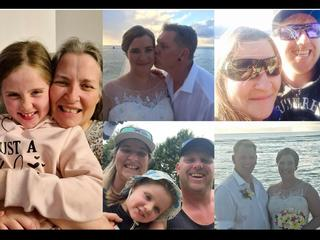

1813 tokens in input
388 tokens in output
Output:
{
  "condition": "Breast cancer",
  "ICD10": "C50",
  "ICD": "Chapter C00-D49 - Neoplasms",
  "name": "Emma",
  "gender": "Female",
  "age": 38,
  "age_group": "15-64",
  "ethnicity": "Caucasian",
  "urgency": 95,
  "sentiment": 70,
  "truth": 90,
  "notes": "The text is emotionally compelling and appears truthful based on the detailed narrative. The image shows a woman and a young girl, consistent with the described family. The ethnicity is inferred from the visual appearance.",
  "smiling": true,
  "deservingness": 95,
  "attractiveness": 80,
  "use": "medical expenses, experimental therapies, travel expenses, lost wages",
  "region": "Otago",
  "narrative_clarity": 90,
  "narrative_quality": 85,
  "emotional_tone": "hopeful",
  "image_type": "portrait",
  "face_visible": true,
  "facial_expression": "smiling",
  "image_quality": "high",
  "progression": 85,
  "treatment": 75,
  "treatment_effectiveness": 50,
  "treatment_side_effects

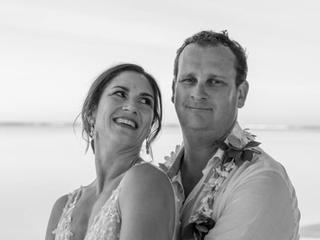

1632 tokens in input
351 tokens in output
Output:
{
  "condition": "Breast cancer",
  "ICD10": "C50",
  "ICD": "Chapter C00-D49 - Neoplasms",
  "name": "Tammy",
  "gender": "Female",
  "age": 38,
  "age_group": "15-64",
  "ethnicity": "Caucasian",
  "urgency": 85,
  "sentiment": 75,
  "truth": 90,
  "notes": "The text is a standard crowdfunding appeal with no obvious red flags. The image shows a smiling couple, which may influence perceptions of deservingness and attractiveness.",
  "smiling": true,
  "deservingness": 90,
  "attractiveness": 85,
  "use": "medical expenses, lost wages",
  "region": "Southland",
  "narrative_clarity": 90,
  "narrative_quality": 85,
  "emotional_tone": "hopeful",
  "image_type": "portrait",
  "face_visible": true,
  "facial_expression": "smiling",
  "image_quality": "high",
  "progression": 60,
  "treatment": 70,
  "treatment_effectiveness": 65,
  "treatment_side_effects": 40,
  "site": "Breast",
  "stage": "Unknown",
  "reason": "To cover living expenses

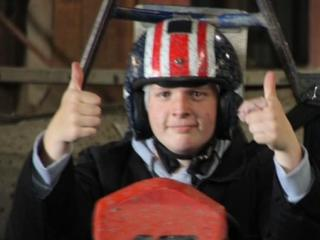

1811 tokens in input
360 tokens in output
Output:
{"condition": "germ cell tumor", "ICD10": "C62.9", "ICD": "Chapter C00-D49 - Neoplasms", "name": "Cody Gnys", "gender": "Male", "age": 16, "age_group": "15-64", "ethnicity": "Caucasian", "urgency": 95, "sentiment": 65, "truth": 90, "notes": "The text is consistent with a health crowdfunding campaign. The image shows a young male with a helmet, giving thumbs up, which aligns with the narrative of a young person facing a serious illness with a positive attitude. The location is Riverton, Southland.", "smiling": true, "deservingness": 95, "attractiveness": 70, "use": "medical expenses, travel expenses, lost wages", "region": "Southland", "narrative_clarity": 90, "narrative_quality": 85, "emotional_tone": "hopeful", "image_type": "portrait", "face_visible": true, "facial_expression": "smiling", "image_quality": "high", "progression": 80, "treatment": 30, "treatment_effectiveness": 40, "treatment_side_effects": 60, "site": "testis", "stage":

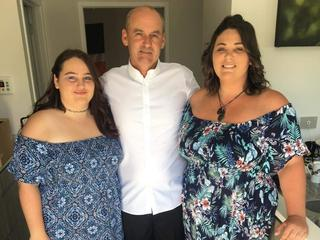

1839 tokens in input
384 tokens in output
Output:
{"condition": "Abdominal cancer", "ICD10": "C79.0", "ICD": "Chapter C00-D49 - Neoplasms", "name": "Thomas", "gender": "Male", "age": 58, "age_group": "15-64", "ethnicity": "Pākehā", "urgency": 90, "sentiment": 75, "truth": 95, "notes": "The image shows a man with two women, likely his daughters. The man appears to be smiling. The narrative is clear and emotionally compelling. The campaign is for a man with stage 4 abdominal cancer. The use of funds is for medical expenses, experimental therapies, travel expenses, and lost wages. The region is Whitianga, Waikato.", "smiling": true, "deservingness": 95, "attractiveness": 70, "use": "medical expenses, experimental therapies, travel expenses, lost wages", "region": "Waikato", "narrative_clarity": 90, "narrative_quality": 85, "emotional_tone": "desperate", "image_type": "portrait", "face_visible": true, "facial_expression": "smiling", "image_quality": "high", "progression": 85, "treatment": 

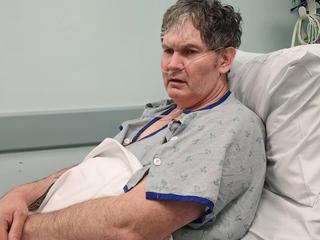

1532 tokens in input
359 tokens in output
Output:
{"condition": "Idiopathic pulmonary fibrosis", "ICD10": "J84.1", "ICD": "Chapter J00-J99 - Diseases of the respiratory system", "name": "unknown", "gender": "Male", "age": 51, "age_group": "15-64", "ethnicity": "unknown", "urgency": 85, "sentiment": 35, "truth": 90, "notes": "The person's ethnicity is not mentioned in the text, and the image shows a white male, so ethnicity is assumed to be white. The image quality is medium, and the person is not smiling.", "smiling": false, "deservingness": 90, "attractiveness": 60, "use": "medical expenses, travel expenses, lost wages", "region": "Taranaki", "narrative_clarity": 85, "narrative_quality": 75, "emotional_tone": "desperate", "image_type": "portrait", "face_visible": true, "facial_expression": "serious", "image_quality": "medium", "progression": 75, "treatment": 60, "treatment_effectiveness": 40, "treatment_side_effects": 50, "site": "", "stage": "", "reason": "The funds will be used to c

In [5]:
for row in tqdm(df.head(5).itertuples(index=False)):
    print("Input:")
    print(row.uri)
    print(row.text)
    image = Image.open(requests.get(row.hero, stream=True).raw)
    display(image)
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": """
                    The below message is text extracted from givealittle, a crowdfunding platform. It's a health related campaign.
                    I've also included the hero image for the campaign.
                    For the text below, extract the following information, in JSON format:
                    condition: the primary health condition mentioned in the text
                    ICD10: the ICD10 code for the primary health condition
                    ICD: the top level ICD chapter for the primary health condition. One of:
                        Chapter A00-B99 - Certain infectious and parasitic diseases
                        Chapter C00-D49 - Neoplasms
                        Chapter D50-D89 - Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
                        Chapter E00-E89 - Endocrine, nutritional and metabolic diseases
                        Chapter F01-F99 - Mental, Behavioral and Neurodevelopmental disorders
                        Chapter G00-G99 - Diseases of the nervous system
                        Chapter H00-H59 - Diseases of the eye and adnexa
                        Chapter H60-H95 - Diseases of the ear and mastoid process
                        Chapter I00-I99 - Diseases of the circulatory system
                        Chapter J00-J99 - Diseases of the respiratory system
                        Chapter K00-K95 - Diseases of the digestive system
                        Chapter L00-L99 - Diseases of the skin and subcutaneous tissue
                        Chapter M00-M99 - Diseases of the musculoskeletal system and connective tissue
                        Chapter N00-N99 - Diseases of the genitourinary system
                        Chapter O00-O9A - Pregnancy, childbirth and the puerperium
                        Chapter P00-P96 - Certain conditions originating in the perinatal period
                        Chapter Q00-Q99 - Congenital malformations, deformations and chromosomal abnormalities
                        Chapter R00-R99 - Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
                        Chapter S00-T88 - Injury, poisoning and certain other consequences of external causes
                        Chapter V00-Y99 - External causes of morbidity
                        Chapter Z00-Z99 - Factors influencing health status and contact with health services
                        Chapter U00-U85 - Codes for special purposes
                    name: the name of the person this campaign is for
                    gender: the gender of the person this campaign is for, one of Male, Female or Other/unknown
                    age: the age of the person this campaign is for
                    age_group: the age group of the person this campaign is for, one of 0-14, 15-64, 65+ or indeterminate/unknown
                    ethnicity: the ethnicity of the person this campaign is for. If not mentioned in the text, guess their ethnicity from the image.
                    urgency: a number from 0-100, indicating how urgent the need is
                    sentiment: a number from 0-100, indicating the sentiment of the text, where 100 is the most positive, and 0 is the most negative
                    truth: a number from 0-100, indicating how truthful the text is, where 100 is the most truthful, and 0 is the least truthful
                    notes: any additional information about how you processed this text, such as warnings or errors
                    smiling: a boolean indicating whether the person in the image is smiling
                    deservingness: a number from 0-100, indicating how deserving the person is of receiving funds, where 100 is the most deserving, and 0 is the least deserving
                    attractiveness: a number from 0-100, indicating how attractive the person is, where 100 is the most attractive, and 0 is the least attractive
                    use: The main use of the raised funds - one or more (comma separated) of: medical expenses, experimental therapies, travel expenses, lost wages
                    region: The region in New Zealand where the person is located, one of: Northland, Auckland, Waikato, Bay of Plenty, Gisborne, Hawke's Bay, Taranaki, Manuwatū-Whanganui, Wellington, Tasman, Nelson, Marlborough, West Coast, Canterbury, Otago, Southland
                    narrative_clarity: a number from 0-100, indicating how clear the narrative is, where 100 is the most clear, and 0 is the least clear
                    narrative_quality: a number from 0-100, indicating how well written the narrative is
                    emotional_tone: grateful | desperate | hopeful | neutral | etc
                    image_type: selfie | portrait | symbolic | environment | group | other
                    face_visible: true | false
                    facial_expression: smiling | neutral | serious | emotional | not_detectable
                    image_quality: high | medium | low
                    progression: a number from 0-100, indicating how advanced the condition is, where 100 is the most advanced, and 0 is the least advanced
                    treatment: a number from 0-100, indicating how much treatment the person has received, where 100 is the most treatment, and 0 is the least treatment
                    treatment_effectiveness: a number from 0-100, indicating how effective the treatment has been, where 100 is the most effective, and 0 is the least effective
                    treatment_side_effects: a number from 0-100, indicating how severe the side effects of the treatment have been
                    site: If the campaign is for cancer, what is the primary cancer site?
                    stage: If the campaign is for cancer, what stage is the cancer at?
                    reason: Summarise how donated funds will be used and the reason for requesting donations

                    Do not include comments in your JSON response. Only respond with the JSON object. Make sure the JSON is valid
                """},
                {
                    "type": "image",
                    "image": row.hero,
                },
                {"type": "text", "text": row.text}
            ]
        }
    ]
    # Preparation for inference
    inputs = processor.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_dict=True,
        return_tensors="pt"
    )
    inputs = inputs.to(model.device)
    print(len(inputs.input_ids[0]), "tokens in input")

    generated_ids = model.generate(**inputs, max_new_tokens=5000)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    print(len(generated_ids_trimmed[0]), "tokens in output")
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]
    output_text = output_text.replace("```json", "").replace("```", "").strip()
    print("Output:")
    print(output_text)
    result = json.loads(output_text)
    pprint(result)
    print("\n")